Task 1:

In this task, I downloaded data from a GitHub repository, processesed it and converted it into a pandas DataFrame.:
I imported necessary libraries such as pandas,requests and openpyxl.

I defined the URL and used requests.get to send an HTTP GET request to the specified URL and store the response.

After downloading the data I created a pandas DataFrame df_classification from the `data_list`, specifying column names as 'size_of_the_house', 'no_of_rooms', and 'price_of_the_house'.

I used df_classification.apply(pd.to_numeric) to convert the DataFrame columns to numeric data types, assuming they were initially stored as strings.


In [2]:
import pandas as pd
import requests
from openpyxl import Workbook

github_raw_url = 'https://raw.githubusercontent.com/kumudlakara/Medium-codes/main/linear_regression/house_price_data.txt'

response = requests.get(github_raw_url)

if response.status_code == 200:
    data = response.text
    lines = data.strip().split('\n')

    data_list = [line.split(',') for line in lines]

    df_classification = pd.DataFrame(data_list, columns=['size_of_the_house', 'no_of_rooms', 'price_of_the_house'])

    df_classification = df_classification.apply(pd.to_numeric)

    excel_file_path = '/content/house_price_data.xlsx'
    df_classification.to_excel(excel_file_path, index=False)

    print(f"Data saved to {excel_file_path}")
else:
    print(f"Failed to download data. Status code: {response.status_code}")

df_classification = pd.read_excel(excel_file_path)

print(df_classification)


Data saved to /content/house_price_data.xlsx
    size_of_the_house  no_of_rooms  price_of_the_house
0                2104            3              399900
1                1600            3              329900
2                2400            3              369000
3                1416            2              232000
4                3000            4              539900
5                1985            4              299900
6                1534            3              314900
7                1427            3              198999
8                1380            3              212000
9                1494            3              242500
10               1940            4              239999
11               2000            3              347000
12               1890            3              329999
13               4478            5              699900
14               1268            3              259900
15               2300            4              449900
16               132

Task 2

In this task I used the matplotlib library to create a single figure with two subplots side by side:

1.Left Subplot (Size vs. Price): Here the x-axis represents the 'Size of the House' and the y-axis represents the 'Price of the House.'
  
2.Right Subplot (Room vs. Price):Here the x-axis represents the 'Number of Rooms' and the y-axis represents the 'Price of the House.'

I used plt.tight_layout() to ensure that the subplots are properly arranged within the figure.

plt.show() is used to display the plots.

These scatter plots visualize the relationships between house size/number of rooms and their corresponding prices in the data contained in the `df_classification` DataFrame.

<ipython-input-3-ee948513ef6d>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_classification['size_of_the_house'], df_classification['price_of_the_house'], c='red', cmap='viridis')
<ipython-input-3-ee948513ef6d>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_classification['no_of_rooms'], df_classification['price_of_the_house'], c='green', cmap='viridis')


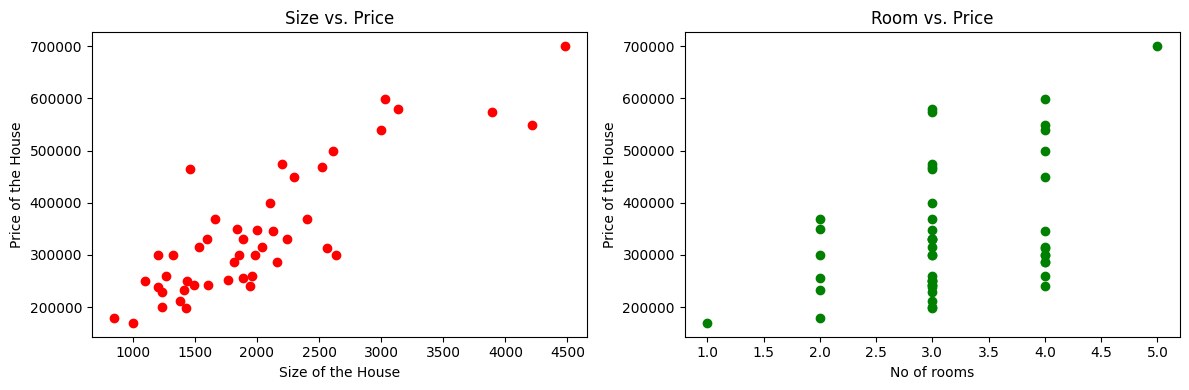

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(df_classification['size_of_the_house'], df_classification['price_of_the_house'], c='red', cmap='viridis')
plt.xlabel('Size of the House')
plt.ylabel('Price of the House')
plt.title('Size vs. Price')

plt.subplot(1, 2, 2)
plt.scatter(df_classification['no_of_rooms'], df_classification['price_of_the_house'], c='green', cmap='viridis')
plt.xlabel('No of rooms')
plt.ylabel('Price of the House')
plt.title('Room vs. Price')

plt.tight_layout()

# Show the plots
plt.show()


Task 3:


In this task, I calculated and displayed various statistics for the columns 'size_of_the_house' and 'no_of_rooms' in the `df_classification` DataFrame.

The `agg` method is used to calculate multiple statistics simultaneously for the columns. For ecah column I calculated Mean,Median,Standard Deviation and Variance

The calculated statistics are stored in the `statistics` DataFrame, which will have 'size_of_the_house' and 'no_of_rooms' as columns and 'mean', 'median', 'std', and 'var' as row labels.


In [4]:
import pandas as pd


statistics = df_classification.agg({
    'size_of_the_house': ['mean', 'median', 'std', 'var'],
    'no_of_rooms': ['mean', 'median', 'std', 'var'],
})

# Display the statistical information
print(statistics)


        size_of_the_house  no_of_rooms
mean          2000.680851     3.170213
median        1888.000000     3.000000
std            794.702354     0.760982
var         631551.830712     0.579093


Task 4:


In this task, I performed feature normalization.I tried to use and explore both the `sklearn.preprocessing` and`MinMaxScaler` from `sklearn.preprocessing`

The features to be normalized are selected from the `df_classification` DataFrame and stored in the `features_to_scale`.

The `normalize` function is used to normalize the selected features in `features_to_scale`. The normalized features are stored in the `normalized_features` DataFrame, with columns named 'size_of_the_house_normalized' and 'no_of_rooms_normalized.'

 A new DataFrame, `df_classification_normalized`, is created by concatenating the normalized features from `df_normalized` with the 'price_of_the_house' column from the original `df_classification` DataFrame.

In [5]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler


# scaler = MinMaxScaler()

# scaled_features = scaler.fit_transform(df_classification[['size_of_the_house', 'no_of_rooms']])

# df_scaled = pd.DataFrame(scaled_features, columns=['size_of_the_house_scaled', 'no_of_rooms_scaled'])

# df_classification_scaled = pd.concat([df_scaled, df_classification['price_of_the_house']], axis=1)

# print(df_classification_scaled)


features_to_scale = df_classification[['size_of_the_house', 'no_of_rooms']]

normalized_features = normalize(features_to_scale)

df_normalized = pd.DataFrame(normalized_features, columns=['size_of_the_house_normalized', 'no_of_rooms_normalized'])

df_classification_normalized = pd.concat([df_normalized, df_classification['price_of_the_house']], axis=1)

print(df_classification_normalized)


    size_of_the_house_normalized  no_of_rooms_normalized  price_of_the_house
0                       0.999999                0.001426              399900
1                       0.999998                0.001875              329900
2                       0.999999                0.001250              369000
3                       0.999999                0.001412              232000
4                       0.999999                0.001333              539900
5                       0.999998                0.002015              299900
6                       0.999998                0.001956              314900
7                       0.999998                0.002102              198999
8                       0.999998                0.002174              212000
9                       0.999998                0.002008              242500
10                      0.999998                0.002062              239999
11                      0.999999                0.001500              347000

Task 5

In this task, I used scikit-learn's `train_test_split` function to split the dataset into training and testing sets.

I defined the feature matrix `X` and the target variable `y`. In this case, `X` includes the 'size_of_the_house' and 'no_of_rooms' columns, and `y` contains the 'price_of_the_house' values.

I used `train_test_split` to split the data into training and testing sets. `X_train` and `y_train` will contain the training data and target values, respectively.`X_test` and `y_test` will contain the testing data and target values, respectively.`test_size=0.20` specifies that 20% of the data will be used for testing, while 80% will be used for training.

This code successfully splits the data into training and testing sets, making it ready for use in machine learning model training and evaluation.

In [6]:
from sklearn.model_selection import train_test_split

X = df_classification[['size_of_the_house', 'no_of_rooms']]
y = df_classification['price_of_the_house']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Training Set:")
print("Training set size:", len(X_train))
print(X_train.head())
print("Training Set(Y):")
print(y_train.head())
print()
print("Testing Set:")
print("Testing set size:", len(X_test))
print(X_test.head())
print("Testing Set(Y):")
print(y_test.head())


Training Set:
Training set size: 37
    size_of_the_house  no_of_rooms
8                1380            3
3                1416            2
6                1534            3
40               1664            2
33               3137            3
Training Set(Y):
8     212000
3     232000
6     314900
40    368500
33    579900
Name: price_of_the_house, dtype: int64

Testing Set:
Testing set size: 10
    size_of_the_house  no_of_rooms
27               2526            3
39               2162            4
26               1458            3
43               1200            3
24               3890            3
Testing Set(Y):
27    469000
39    287000
26    464500
43    299000
24    573900
Name: price_of_the_house, dtype: int64


Task 6

In this task, I defined a linear regression hypothesis function.

I defined the `hypothesis` function, which calculates predictions for a linear regression model given the feature matrix `x` and parameter vector `theta`. The function uses a loop to iterate over the data points and computes the predictions for each data point.

I loaded the feature matrix `x` and target variable `y` from the `df_classification` DataFrame.

 I initialized the parameter vector `theta` with random values using `np.random.rand`.I created a new feature matrix `x_with_bias` by adding a column of ones (bias term) to the original feature matrix `x`. Then I used an `assert` statement to check that the dimensions of `x_with_bias` match the length of `theta`.

In [7]:
import numpy as np

def hypothesis(x, theta):
    m, n = x.shape  # m data points, n features
    predictions = np.zeros(m)

    for i in range(m):
        prediction = theta[0]

        for j in range(1, n):
            prediction += x[i, j] * theta[j]

        predictions[i] = prediction

    return predictions

x = df_classification[['size_of_the_house', 'no_of_rooms']].values
y = df_classification['price_of_the_house'].values

theta = np.random.rand(x.shape[1] + 1)

x_with_bias = np.column_stack((np.ones(x.shape[0]), x))


assert x_with_bias.shape[1] == len(theta), "Dimensions mismatch between x_with_bias and theta"

predictions = hypothesis(x_with_bias, theta)

print(predictions)


[1240.33926766  943.77336099 1414.51289539  834.98076115 1768.09005311
 1170.83926884  904.9373494   841.97593667  814.31998903  881.40037268
 1144.36017003 1179.14312819 1114.41644221 2638.30384984  748.41645421
 1356.19296051  778.49201702  729.58687284 1538.01610567 1786.33121007
 1042.04023879 1112.71708644  946.12705866 1157.30550723 2291.2652782
  649.56115199  860.21709363 1488.65437205 1296.82801179 1553.96948245
 1083.88428996  589.67369633 1203.20261183 1848.18169145 1068.45342011
  847.86018085  731.35214609 1257.33765829 2483.02572098 1274.99039083
  980.91001681 1319.18813967 1513.30228012  708.40359379  503.1093894
 1092.57882125  710.16886704]


Task 7

In this task, I defined a cost function for linear regression, calculates the cost (mean squared error) based on the provided feature matrix `X`, target variable `y`, and parameter vector `theta`.

I loaded the feature matrix `X` and target variable `y` from the `df_classification` DataFrame and initialized the parameter vector `theta` with zeros. The length of `theta` is determined by the number of features plus one to account for the bias term.

I created a new feature matrix `X_with_bias` by adding a column of ones (bias term) to the original feature matrix `X`.

In [8]:
import numpy as np

def cost_function(X, y, theta):

    m = len(y)
    y_pred = hypothesis(X,theta)
    squared_errors = (y_pred - y) ** 2
    cost = (1 / ( m)) * np.sum(squared_errors)
    return cost

X = df_classification[['size_of_the_house', 'no_of_rooms']].values
y = df_classification['price_of_the_house'].values

theta = np.zeros(X.shape[1] + 1)

X_with_bias = np.column_stack((np.ones(X.shape[0]), X))

cost = cost_function(X_with_bias, y, theta)

print("Cost (MSE):", cost)




Cost (MSE): 131183096212.91489


Task 8:

In this task, I implemented the gradient descent algorithm for linear regression. It iteratively updates the parameter vector `theta` to minimize the mean squared error (MSE) cost function.

The function takes the feature matrix `x`, target variable `y`, initial parameter vector `theta`, learning rate (`learning_rate`), and the number of epochs (`num_epochs`) as input arguments.

I initialized an empty list `cost_history` to store the cost (MSE) at each epoch.I iterated through the specified number of epochs, calculated predictions (`y_predicted`) using the `hypothesis` function, calculated the error between predictions and actual values, computed gradients for each parameter using a loop, update each parameter in `theta` using the calculated gradients and learning rate and calculate the cost at the current epoch and append it to `cost_history`.

I loaded the feature matrix `X` and target variable `y` from the `df_classification` DataFrame. I created a new feature matrix `X_with_bias` by adding a column of ones (bias term) to the original feature matrix `X`. This is necessary for the linear regression model.

I initialized the parameter vector `theta` with zeros. The length of `theta` is determined by the number of features plus one to account for the bias term.


In [9]:
import numpy as np

def gradient_descent(x, y, theta, learning_rate=0.01, num_epochs=10):
    m = len(y)
    cost_history = []

    for epoch in range(num_epochs):
        y_predicted = hypothesis(x, theta)
        error = y_predicted - y

        gradients = np.zeros(len(theta))

        for j in range(len(theta)):

            gradient = (1 / m) * np.sum(error * x[:, j])
            gradients[j] = gradient

        # Updated theta
        theta -= learning_rate * gradients

        # Calculate the cost
        cost = cost_function(x, y, theta)
        cost_history.append(cost)

        print(f"Epoch {epoch + 1}/{num_epochs}, Cost: {cost}")

    return theta, cost_history

X = df_classification[['size_of_the_house', 'no_of_rooms']].values
y = df_classification['price_of_the_house'].values

theta = np.zeros(X.shape[1] + 1)

X_with_bias = np.column_stack((np.ones(X.shape[0]), X))

learning_rate = 0.01
num_epochs = 10

updated_theta, cost_History = gradient_descent(x_with_bias, y, theta, learning_rate, num_epochs)

print("Updated Theta:", updated_theta)

print("Cost History:", cost_History)


Epoch 1/10, Cost: 2.698537354232303e+20
Epoch 2/10, Cost: 5.761733643176521e+29
Epoch 3/10, Cost: 1.2302062272154653e+39
Epoch 4/10, Cost: 2.626652766692885e+48
Epoch 5/10, Cost: 5.6082505551867985e+57
Epoch 6/10, Cost: 1.1974355609003316e+67
Epoch 7/10, Cost: 2.5566830661347543e+76
Epoch 8/10, Cost: 5.458856003696293e+85
Epoch 9/10, Cost: 1.1655378511245018e+95
Epoch 10/10, Cost: 2.4885772430781646e+104
Updated Theta: [-3.17739580e+45 -7.33861634e+48 -1.05993953e+46]
Cost History: [2.698537354232303e+20, 5.761733643176521e+29, 1.2302062272154653e+39, 2.626652766692885e+48, 5.6082505551867985e+57, 1.1974355609003316e+67, 2.5566830661347543e+76, 5.458856003696293e+85, 1.1655378511245018e+95, 2.4885772430781646e+104]


Task 9:

In this task, I set `num_epochs` to 50. I reinitialize `theta` with zeros and set a smaller `learning_rate` of 0.0001. I used smaller learning rate to avoid `INF` value.

The output displays the final cost and the parameters (`updated_theta`).

In [10]:
num_epochs = 50


theta = np.zeros(X.shape[1] + 1)

learning_rate = 0.0001
updated_theta, j_all  = gradient_descent(x_with_bias, y, theta, learning_rate, num_epochs)

final_cost = cost_function(x_with_bias, y, updated_theta)

print("Cost:", final_cost)
print("Parameters:", updated_theta)


Epoch 1/50, Cost: 2.686986935368322e+16
Epoch 2/50, Cost: 5.712513822989356e+21
Epoch 3/50, Cost: 1.2144763181559157e+27
Epoch 4/50, Cost: 2.5819678920110624e+32
Epoch 5/50, Cost: 5.489245113892945e+37
Epoch 6/50, Cost: 1.1670095516535744e+43
Epoch 7/50, Cost: 2.4810538888193602e+48
Epoch 8/50, Cost: 5.274702671030893e+53
Epoch 9/50, Cost: 1.1213979830571152e+59
Epoch 10/50, Cost: 2.3840840229934563e+64
Epoch 11/50, Cost: 5.0685454357582665e+69
Epoch 12/50, Cost: 1.0775691035456613e+75
Epoch 13/50, Cost: 2.2909041413031938e+80
Epoch 14/50, Cost: 4.870445679419693e+85
Epoch 15/50, Cost: 1.0354532382434826e+91
Epoch 16/50, Cost: 2.201366115465353e+96
Epoch 17/50, Cost: 4.680088482353559e+101
Epoch 18/50, Cost: 9.949834354576802e+106
Epoch 19/50, Cost: 2.1153276066637796e+112
Epoch 20/50, Cost: 4.4971712332634434e+117
Epoch 21/50, Cost: 9.560953602449167e+122
Epoch 22/50, Cost: 2.032651839273001e+128
Epoch 23/50, Cost: 4.3214031481561927e+133
Epoch 24/50, Cost: 9.187271921380012e+138
Epoc

Task 10:

In this code, I extracted the 'size_of_the_house' and 'no_of_rooms' columns from the `df_classification` DataFrame and store them in the `x1` and `x2` arrays, respectively. The target variable 'price_of_the_house' is stored in the `y` array.

I retrieved the updated parameters `theta0`, `theta1`, and `theta2` from `updated_theta`.

I calculated the predicted values `y_pred1` and `y_pred2` for house prices based on the linear regression model.

I created a scatter plot for 'Size of the House' vs. 'Price' in blue and another scatter plot for 'Number of Rooms' vs. 'Price' in red.

Then I plotted the best-fitted lines for both relationships. The best-fitted line for 'Size of the House' ins green and best-fitted line for 'Number of Rooms' is orange.


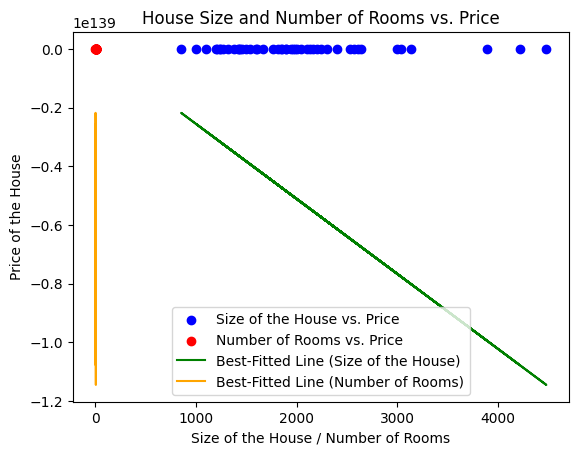

In [11]:
# import matplotlib.pyplot as plt

# x1 = df_classification['size_of_the_house'].values
# x2 = df_classification['no_of_rooms'].values
# y = df_classification['price_of_the_house'].values

# theta0 = updated_theta[0]
# theta1 = updated_theta[1]
# theta2 = updated_theta[2]

# y_pred1 = theta0 + theta1 * x1 + theta2 * x2
# y_pred2 = theta0 + theta1 * x1 + theta2 * x2

# # plt.scatter(x1, y, c='blue', label='Size of the House vs. Price')

# # plt.plot(x1, y_pred, c='green', label='Best-Fitted Line (Size of the House)')

# # plt.xlabel('Size of the House')
# # plt.ylabel('Price of the House')
# # plt.legend()
# # plt.title('Size of the House vs. Price')

# # plt.show()

# # plt.scatter(x2, y, c='red', label='Number of Rooms vs. Price')

# # plt.plot(x2, y_pred, c='green', label='Best-Fitted Line (Number of Rooms)')

# # plt.xlabel('Number of Rooms')
# # plt.ylabel('Price of the House')
# # plt.legend()
# # plt.title('Number of Rooms vs. Price')

# # plt.show()


# plt.scatter(x1, y, c='blue', label='Size of the House vs. Price')
# plt.plot(x1, y_pred1, c='green', label='Best-Fitted Line (Size of the House)')

# plt.scatter(x2, y, c='red', label='Number of Rooms vs. Price')
# plt.plot(x2, y_pred2, c='orange', label='Best-Fitted Line (Number of Rooms)')

# plt.xlabel('Size of the House / Number of Rooms')
# plt.ylabel('Price of the House')
# plt.legend()
# plt.title('House Size and Number of Rooms vs. Price')

# plt.show()



import matplotlib.pyplot as plt

x1 = df_classification['size_of_the_house'].values
x2 = df_classification['no_of_rooms'].values
y = df_classification['price_of_the_house'].values

theta0 = updated_theta[0]
theta1 = updated_theta[1]
theta2 = updated_theta[2]

y_pred1 = theta0 + theta1 * x1 + theta2 * x2
y_pred2 = theta0 + theta1 * x1 + theta2 * x2

plt.scatter(x1, y, c='blue', label='Size of the House vs. Price')
plt.scatter(x2, y, c='red', label='Number of Rooms vs. Price')

# Plot the best-fitted lines
plt.plot(x1, y_pred1, c='green', label='Best-Fitted Line (Size of the House)')
plt.plot(x2, y_pred2, c='orange', label='Best-Fitted Line (Number of Rooms)')

plt.xlabel('Size of the House / Number of Rooms')
plt.ylabel('Price of the House')
plt.legend()
plt.title('House Size and Number of Rooms vs. Price')

plt.show()



Task 11

In this task, I plotted the cost function's value at each epoch to visualize how it changes during the training process.

I created a list `epochs` representing the number of epochs from 1 to the length of `j_all`, which contains the cost function values at each epoch.
Then I used a `for` loop to iterate through the `j_all` list, printing the cost function value for each epoch.

I then created a plot using `plt.plot` to visualize the cost function values over the epochs. The x-axis represents the epoch number, and the y-axis represents the cost function value.

Epoch 1: 2.686986935368322e+16
Epoch 2: 5.712513822989356e+21
Epoch 3: 1.2144763181559157e+27
Epoch 4: 2.5819678920110624e+32
Epoch 5: 5.489245113892945e+37
Epoch 6: 1.1670095516535744e+43
Epoch 7: 2.4810538888193602e+48
Epoch 8: 5.274702671030893e+53
Epoch 9: 1.1213979830571152e+59
Epoch 10: 2.3840840229934563e+64
Epoch 11: 5.0685454357582665e+69
Epoch 12: 1.0775691035456613e+75
Epoch 13: 2.2909041413031938e+80
Epoch 14: 4.870445679419693e+85
Epoch 15: 1.0354532382434826e+91
Epoch 16: 2.201366115465353e+96
Epoch 17: 4.680088482353559e+101
Epoch 18: 9.949834354576802e+106
Epoch 19: 2.1153276066637796e+112
Epoch 20: 4.4971712332634434e+117
Epoch 21: 9.560953602449167e+122
Epoch 22: 2.032651839273001e+128
Epoch 23: 4.3214031481561927e+133
Epoch 24: 9.187271921380012e+138
Epoch 25: 1.953207383425704e+144
Epoch 26: 4.152504808081954e+149
Epoch 27: 8.828195268697455e+154
Epoch 28: 1.8768679460783413e+160
Epoch 29: 3.990207714941124e+165
Epoch 30: 8.48315281937853e+170
Epoch 31: 1.8035121702

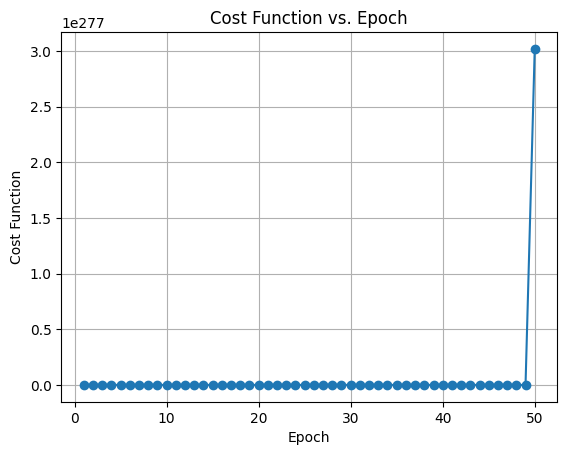

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, len(j_all) + 1)
for epoch, cost in enumerate(j_all, start=1):
    print(f"Epoch {epoch}: {cost}")
# Create a plot for the cost function vs. epoch
plt.plot(epochs, j_all, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Epoch')
plt.grid(True)

# Show the plot
plt.show()


Task 12

In this task, I loaded the features ('size_of_the_house' and 'no_of_rooms') into `X` and the target variable ('price_of_the_house') into `y` from the `df_classification` DataFrame.

The data is splitted into training and testing sets using `train_test_split`. 80% of the data is used for training (`X_train` and `y_train`), and 20% is used for testing (`X_test` and `y_test`).

I created `LinearRegression` model using `model = LinearRegression()`.

The model is fitted to the training data using `model.fit(X_train, y_train) and `Predictions` are made on the test data using.

I calculated the Mean Squared Error (MSE) and R-squared (R2) score are calculated using scikit-learn's `mean_squared_error` and `r2_score` functions.

The coefficients and intercept of the linear regression model represents the equation of the best-fitted line.

Finally, I created a scatter plot of the actual house prices (`y_test`) against the 'size_of_the_house' and the best-fitted line (`y_pred`) on the same plot.

Mean Squared Error (MSE): 8610424544.777676
R-squared (R2) Score: 0.5148848812741439
Coefficients: [   143.21853204 -13512.56442597]
Intercept: 84763.62252219388


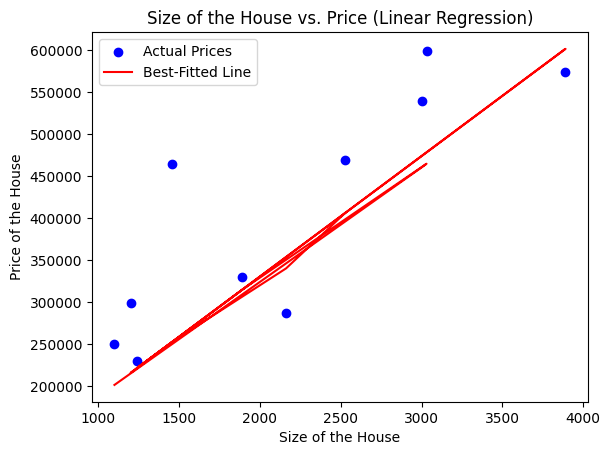

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


X = df_classification[['size_of_the_house', 'no_of_rooms']]
y = df_classification['price_of_the_house']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

# Print the coefficients and intercept of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Plot the best-fit line
plt.scatter(X_test['size_of_the_house'], y_test, c='blue', label='Actual Prices')
plt.plot(X_test['size_of_the_house'], y_pred, c='red', label='Best-Fitted Line')
plt.xlabel('Size of the House')
plt.ylabel('Price of the House')
plt.legend()
plt.title('Size of the House vs. Price (Linear Regression)')

plt.show()
